In [2]:
import json

json_path = "data/vid/annotations/sky_data_vid_train.json"
with open(json_path, "r") as f:
    labels = json.load(f)
labels.keys()

dict_keys(['categories', 'videos', 'images', 'annotations'])

In [3]:
labels['categories']

[{'id': 1, 'name': 'uav', 'encode_name': 'None'}]

In [5]:
len(labels['images'])

8782

In [6]:
labels['images'][:3]

[{'file_name': 'sky_data3/train/af+tree+sky01/rgb/000000.jpg',
  'height': 512,
  'width': 640,
  'id': 1,
  'frame_id': 0,
  'video_id': 1,
  'is_vid_train_frame': True},
 {'file_name': 'sky_data3/train/af+tree+sky01/rgb/000001.jpg',
  'height': 512,
  'width': 640,
  'id': 2,
  'frame_id': 1,
  'video_id': 1,
  'is_vid_train_frame': True},
 {'file_name': 'sky_data3/train/af+tree+sky01/rgb/000002.jpg',
  'height': 512,
  'width': 640,
  'id': 3,
  'frame_id': 2,
  'video_id': 1,
  'is_vid_train_frame': True}]

In [7]:
labels['annotations'][:3]

[{'id': 1,
  'video_id': 1,
  'image_id': 1,
  'category_id': 1,
  'instance_id': -1,
  'bbox': [590, 63, 25, 19],
  'area': 475,
  'iscrowd': False,
  'occluded': False,
  'generated': False},
 {'id': 2,
  'video_id': 1,
  'image_id': 1,
  'category_id': 1,
  'instance_id': -1,
  'bbox': [597, 85, 43, 61],
  'area': 2623,
  'iscrowd': False,
  'occluded': False,
  'generated': False},
 {'id': 3,
  'video_id': 1,
  'image_id': 2,
  'category_id': 1,
  'instance_id': -1,
  'bbox': [590, 63, 25, 19],
  'area': 475,
  'iscrowd': False,
  'occluded': False,
  'generated': False}]

In [8]:
from pycocotools.coco import COCO

coco = COCO(json_path)

loading annotations into memory...
Done (t=0.06s)
creating index...
index created!


In [11]:
ids = list(sorted(coco.imgs.keys()))
len(ids)

8782

In [12]:
# 获取类别数量
num_categories = len(coco.getCatIds())
print(f"Number of categories: {num_categories}")

# 获取图像数量
num_images = len(coco.getImgIds())
print(f"Number of images: {num_images}")

Number of categories: 1
Number of images: 8782


In [27]:
# 获取一张图像的ID
image_id = coco.getImgIds()[0]
print(image_id)
# 获取图像信息
image_info = coco.loadImgs(image_id)[0]
print(image_info)

1
{'file_name': 'sky_data3/train/af+tree+sky01/rgb/000000.jpg', 'height': 512, 'width': 640, 'id': 1, 'frame_id': 0, 'video_id': 1, 'is_vid_train_frame': True}


In [14]:
coco.loadImgs(image_id)

[{'file_name': 'sky_data3/train/af+tree+sky01/rgb/000000.jpg',
  'height': 512,
  'width': 640,
  'id': 1,
  'frame_id': 0,
  'video_id': 1,
  'is_vid_train_frame': True}]

In [26]:
# 获取图像的标注ID
annotation_ids = coco.getAnnIds(imgIds=image_id)
# 获取标注信息
annotations = coco.loadAnns(annotation_ids)
for annotation in annotations:
    print(annotation)

{'id': 1, 'video_id': 1, 'image_id': 1, 'category_id': 1, 'instance_id': -1, 'bbox': [590, 63, 25, 19], 'area': 475, 'iscrowd': False, 'occluded': False, 'generated': False}
{'id': 2, 'video_id': 1, 'image_id': 1, 'category_id': 1, 'instance_id': -1, 'bbox': [597, 85, 43, 61], 'area': 2623, 'iscrowd': False, 'occluded': False, 'generated': False}


data/vid/Data/sky_data3/train/af+tree+sky01/rgb/000000.jpg
(512, 640, 3)


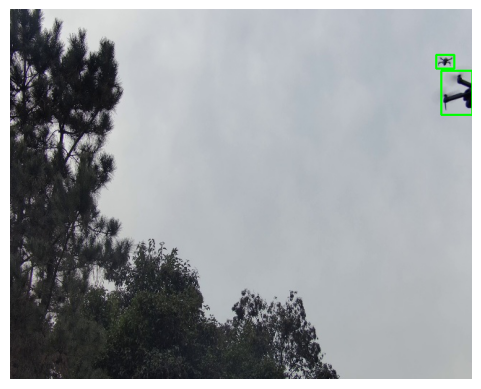

In [33]:
import matplotlib.pyplot as plt
import cv2
import os

# 读取图像
data_root = "data/vid/Data"
image_path = os.path.join(data_root, image_info['file_name'])
print(image_path)
image = cv2.imread(image_path)
print(image.shape)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 绘制边界框
for annotation in annotations:
    x, y, w, h = annotation['bbox']
    cv2.rectangle(image, (int(x), int(y)), (int(x + w), int(y + h)), (0, 255, 0), 2)

# 显示图像
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
import json
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import cv2
import os
import tqdm

json_path = "data/vid/annotations/sky_data_vid_train.json"
coco = COCO(json_path)

# 获取类别数量
num_categories = len(coco.getCatIds())
print(f"Number of categories: {num_categories}")

# 获取图像数量
num_images = len(coco.getImgIds())
print(f"Number of images: {num_images}")

for img_idx in tqdm.tqdm(range(num_images)):
    # 获取一张图像的ID
    image_id = coco.getImgIds()[img_idx]
    # 获取图像信息
    image_info = coco.loadImgs(image_id)[0]

    # 读取图像
    data_root = "data/vid/Data"
    image_path = os.path.join(data_root, image_info['file_name'])
    res_root = "data/bbox_check"
    res_item = image_info['file_name'].replace("/", "_")
    res_path = os.path.join(res_root, res_item)
    # print(res_path)
    image = cv2.imread(image_path)
    # print(image.shape)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 获取图像的标注ID
    annotation_ids = coco.getAnnIds(imgIds=image_id)
    # 获取标注信息
    annotations = coco.loadAnns(annotation_ids)

    # 绘制边界框
    for annotation in annotations:
        x, y, w, h = annotation['bbox']
        cv2.rectangle(image, (int(x), int(y)), (int(x + w), int(y + h)), (0, 255, 0), 2)
    cv2.imwrite(res_path, image)
    # 显示图像
    # plt.imshow(image)
    # # plt.axis('off')
    # # plt.show()
    # plt.savefig(res_path)
    # plt.cla()
    # break

loading annotations into memory...
Done (t=0.09s)
creating index...
index created!
Number of categories: 1
Number of images: 8782


  0%|          | 0/8782 [00:00<?, ?it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000000.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000001.jpg


  0%|          | 2/8782 [00:00<10:31, 13.91it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000002.jpg


  0%|          | 4/8782 [00:00<11:33, 12.65it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000003.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000004.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000005.jpg


  0%|          | 8/8782 [00:00<09:57, 14.67it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000006.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000007.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000008.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000009.jpg


  0%|          | 12/8782 [00:00<09:33, 15.28it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000010.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000011.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000012.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000013.jpg


  0%|          | 16/8782 [00:01<09:15, 15.78it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000014.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000015.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000016.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000017.jpg


  0%|          | 18/8782 [00:01<09:17, 15.73it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000018.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000019.jpg


  0%|          | 20/8782 [00:01<09:34, 15.24it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000020.jpg


  0%|          | 22/8782 [00:01<09:25, 15.48it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000021.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000022.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000023.jpg


  0%|          | 25/8782 [00:01<08:14, 17.72it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000024.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000025.jpg


  0%|          | 27/8782 [00:01<08:01, 18.18it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000026.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000027.jpg


  0%|          | 29/8782 [00:01<08:47, 16.59it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000028.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000029.jpg


  0%|          | 31/8782 [00:01<08:32, 17.09it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000030.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000031.jpg


  0%|          | 33/8782 [00:02<08:34, 17.02it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000032.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000033.jpg


  0%|          | 35/8782 [00:02<08:43, 16.71it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000034.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000035.jpg


  0%|          | 37/8782 [00:02<08:28, 17.21it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000036.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000037.jpg


  0%|          | 40/8782 [00:02<07:42, 18.90it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000038.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000039.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000040.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000041.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000042.jpg


  0%|          | 43/8782 [00:02<07:31, 19.37it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000043.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000044.jpg


  1%|          | 45/8782 [00:02<07:49, 18.61it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000045.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000046.jpg


  1%|          | 47/8782 [00:02<08:22, 17.38it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000047.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000048.jpg


  1%|          | 49/8782 [00:02<08:33, 17.02it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000049.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000050.jpg


  1%|          | 51/8782 [00:03<08:45, 16.60it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000051.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000052.jpg


  1%|          | 53/8782 [00:03<08:52, 16.40it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000053.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000054.jpg


  1%|          | 56/8782 [00:03<08:00, 18.17it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000055.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000056.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000057.jpg


  1%|          | 59/8782 [00:03<07:47, 18.67it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000058.jpg


  1%|          | 61/8782 [00:03<08:03, 18.05it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000059.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000060.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000061.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000062.jpg


  1%|          | 65/8782 [00:03<08:29, 17.12it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000063.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000064.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000065.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000066.jpg


  1%|          | 69/8782 [00:04<08:28, 17.12it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000067.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000068.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000069.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000070.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000071.jpg


  1%|          | 74/8782 [00:04<07:42, 18.83it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000072.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000073.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000074.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000075.jpg


  1%|          | 78/8782 [00:04<08:10, 17.75it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000076.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000077.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000078.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000079.jpg


  1%|          | 82/8782 [00:04<07:55, 18.28it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000080.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000081.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000082.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000083.jpg


  1%|          | 86/8782 [00:05<08:09, 17.76it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000084.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000085.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000086.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000087.jpg


  1%|          | 91/8782 [00:05<07:35, 19.08it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000088.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000089.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000090.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000091.jpg


  1%|          | 95/8782 [00:05<08:33, 16.91it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000092.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000093.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000094.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000095.jpg


  1%|          | 99/8782 [00:05<09:11, 15.75it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000096.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000097.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000098.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000099.jpg


  1%|          | 103/8782 [00:06<08:45, 16.52it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000100.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000101.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000102.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000103.jpg


  1%|          | 106/8782 [00:06<08:04, 17.91it/s]

data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000104.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000105.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000106.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000107.jpg


  1%|▏         | 111/8782 [00:06<08:27, 17.08it/s]


data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000108.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000109.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000110.jpg
data/bbox_check/sky_data3_train_af+tree+sky01_rgb_000111.jpg


KeyboardInterrupt: 